## 1. Load data

In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import muon as mu

In [23]:
from muon import atac as ac  # the module containing function for scATAC data processing

In [24]:
# Setting figure parameters
sc.settings.verbosity = 0
sns.set(rc={"figure.figsize": (4, 3.5), "figure.dpi": 100})
sns.set_style("whitegrid")

In [62]:
!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5231k  100 5231k    0     0  1699k      0  0:00:03  0:00:03 --:--:-- 1700k


In [15]:
!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz
!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1956M  100 1956M    0     0  10.8M      0  0:03:00  0:03:00 --:--:-- 11.4M    0  9270k      0  0:03:36  0:00:20  0:03:16 10.4M441k      0  0:03:32  0:00:42  0:02:50 9267k  0     0  9650k      0  0:03:27  0:00:50  0:02:37 12.4M    0  0:03:05  0:01:29  0:01:36 12.3M 984M    0     0  10.6M      0  0:03:03  0:01:32  0:01:31 12.4M192M    0     0  10.8M      0  0:02:59  0:01:49  0:01:10 12.4M      0  0:03:00  0:01:55  0:01:05 10.3M396M    0     0  10.8M      0  0:03:00  0:02:08  0:00:52 11.1M03:00  0:02:33  0:00:27 11.2M      0  0:03:00  0:02:47  0:00:13 9579k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1003k  100 1003k    0     0   779k      0  0:00:01  0:00:01 --:--:--  780k


In [63]:
!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  154M  100  154M    0     0  6257k      0  0:00:25  0:00:25 --:--:-- 6903k 0     0  6344k      0  0:00:24  0:00:05  0:00:19 6444k0     0  5982k      0  0:00:26  0:00:15  0:00:11 5153k    0  6083k      0  0:00:26  0:00:20  0:00:06 6382k


In [16]:
!mkdir pbmc10k

In [64]:
!mv pbmc_granulocyte* pbmc10k

In [65]:
data_dir = './pbmc10k'

In [66]:
import os

In [67]:
#Remove file prefixes
prefix = "pbmc_granulocyte_sorted_10k_"
for file in os.listdir(data_dir):
    if file.startswith(prefix):
        new_filename = file[len(prefix):]
        os.rename(os.path.join(data_dir, file), os.path.join(data_dir, new_filename))

In [68]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))

/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from ./pbmc10k/filtered_feature_bc_matrix.h5


/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/mudata/_core/mudata.py:477: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from ./pbmc10k/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: ./pbmc10k/atac_fragments.tsv.gz


In [69]:
mdata.var_names_make_unique()

In [26]:
mdata.write("pbmc10k.h5mu")

In [70]:
mdata = mu.read("pbmc10k.h5mu")
mdata

MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

The ATAC modality contains two entries in the unstructured data slot that contain the peak annotation and the path to the fragment file automatically located by muon.

In [90]:
mdata.mod['atac'].uns

{'atac': {'peak_annotation':                                peak  distance peak_type
  gene_name                                              
  MIR1302-2HG        chr1:10109-10357    -19197    distal
  AL627309.5       chr1:180730-181630     -6869    distal
  AL627309.5       chr1:191491-191736    -17630    distal
  AP006222.2       chr1:267816-268196       962    distal
  AC114498.1       chr1:586028-586373     -1256    distal
  ...                             ...       ...       ...
  AC213203.2   KI270713.1:20444-22615      9913    distal
  AC213203.2   KI270713.1:27118-28927      3601    distal
  AC213203.2   KI270713.1:29485-30706      1822    distal
  AC213203.2   KI270713.1:31511-32072       456    distal
  AC213203.1   KI270713.1:37129-37638      1723    distal
  
  [141066 rows x 3 columns]},
 'files': {'fragments': './pbmc10k/atac_fragments.tsv.gz'}}

In [91]:
atac = mdata.mod["atac"]
atac

AnnData object with n_obs × n_vars = 11909 × 108377
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'atac', 'files'

## 2. Quality control

### 2.1. Doublet detection

In [10]:
import os

os.environ['R_HOME'] = '/Applications/anaconda3/envs/SCanalysis/lib/R'

In [11]:
# Packages enabling to run R code
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri

In [12]:
pandas2ri.activate()  # Automatically convert rpy2 outputs to pandas DataFrames
anndata2ri.activate()
%load_ext rpy2.ipython

/var/folders/ly/mwzzbn7j7yd69hdl9hq_23540000gn/T/ipykernel_19031/861610988.py:2: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [13]:
%%R
print("Hello from R!")

[1] "Hello from R!"


In [14]:
%%R
suppressPackageStartupMessages(library(scDblFinder))
suppressPackageStartupMessages(library(SingleCellExperiment))

In [17]:
#save list of barcode
barcodes = list(atac.obs_names)

In [23]:
#To enable the transfer of our data matrix to an SingleCellExperiment R object
#we transpose (.T) and convert the sparse matrix in the atac.X slot into an array (.A). 
data_mat = atac.X.T.toarray()

In [24]:
#Count distribution-based doublet scoring
%R -i data_mat -o dbl_score sce <- scDblFinder(SingleCellExperiment(list(counts=data_mat)), \
                                               clusters=TRUE, aggregateFeatures=TRUE, nfeatures=25, \
                                               processing="normFeatures"); dbl_score <- sce$scDblFinder.score

Aggregating features...
Clustering cells...
Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
  You're computing too large a percentage of total singular values, use a standard svd instead.
9 clusters
Creating ~9528 artificial doublets...
Dimensional reduction
Evaluating kNN...
Training model...
iter=0, 1114 cells excluded from training.
iter=1, 1114 cells excluded from training.
iter=2, 1114 cells excluded from training.
Threshold found:0.4
1500 (12.6%) doublets called
Además: Warning message:
In .checkSCE(sce) :
  Some cells in `sce` have an extremely low read counts; note that these could trigger errors and might best be filtered out


array([0.44624792, 0.29090772, 0.11134703, ..., 0.        , 0.28792639,
       0.30510247])

Based on the output 12.6% are suggested to be doulets.

In [27]:
scDbl_result = pd.DataFrame({"barcodes": barcodes, "scDblFinder_score": dbl_score})
scDbl_result.to_csv("scDblFinder_scores_pbmc10k.csv")

In [29]:
scDbl_result.head()

,barcodes,scDblFinder_score
0,AAACAGCCAAGGAATC-1,0.446248
1,AAACAGCCAATCCCTT-1,0.290908
2,AAACAGCCAATGCGCT-1,0.111347
3,AAACAGCCACACTAAT-1,0.012987
4,AAACAGCCACCAACCG-1,0.103926


In [30]:
scDbl_result = scDbl_result.set_index("barcodes")
scDbl_result.head()

,scDblFinder_score
barcodes,
AAACAGCCAAGGAATC-1,0.446248
AAACAGCCAATCCCTT-1,0.290908
AAACAGCCAATGCGCT-1,0.111347
AAACAGCCACACTAAT-1,0.012987
AAACAGCCACCAACCG-1,0.103926


In [92]:
#add the column to adata.obs
atac.obs["scDblFinder_score"] = scDbl_result["scDblFinder_score"]

In [93]:
atac.obs

,scDblFinder_score
AAACAGCCAAGGAATC-1,0.446248
AAACAGCCAATCCCTT-1,0.290908
AAACAGCCAATGCGCT-1,0.111347
AAACAGCCACACTAAT-1,0.012987
AAACAGCCACCAACCG-1,0.103926
...,...
TTTGTTGGTGTTAAAC-1,0.150308
TTTGTTGGTTAGGATT-1,0.022848
TTTGTTGGTTGCAGTA-1,0.000000
TTTGTTGGTTGGTTAG-1,0.287926


In [94]:
#Threshold found:0.4
threshold = 0.4
atac.obs["scDblFinder_class"] = atac.obs["scDblFinder_score"].apply(lambda x: 'doublet' if x >= threshold else 'singlet')

In [95]:
atac.obs["scDblFinder_class"].value_counts()

scDblFinder_class
singlet    10409
doublet     1500
Name: count, dtype: int64

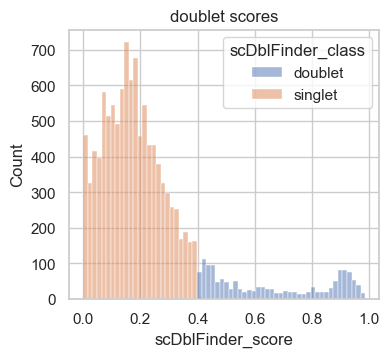

In [96]:
sns.histplot(x=atac.obs["scDblFinder_score"], hue=atac.obs["scDblFinder_class"])
plt.title("doublet scores")
plt.show()

In [97]:
atac = atac[atac.obs["scDblFinder_class"] == 'singlet']

In [100]:
atac.write("pbmc10k_atac_doublet.h5ad")

### 2.2. Calculating QC metrics

#### 2.2.1. Features count and fragment count
- total_counts = total_fragment_counts 
- n_genes_by_counts = n_features_per_cell

In [5]:
atac = sc.read("pbmc10k_atac_doublet.h5ad")

In [6]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [7]:
atac.obs.rename(columns={ "n_genes_by_counts": "n_features_per_cell",\
                         "total_counts": "total_fragment_counts",},\
                inplace=True
               )

In [8]:
atac

AnnData object with n_obs × n_vars = 10409 × 108377
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

In [9]:
#log-transform total counts and add as column
atac.obs["log_total_fragment_counts"] = np.log10(atac.obs["total_fragment_counts"])

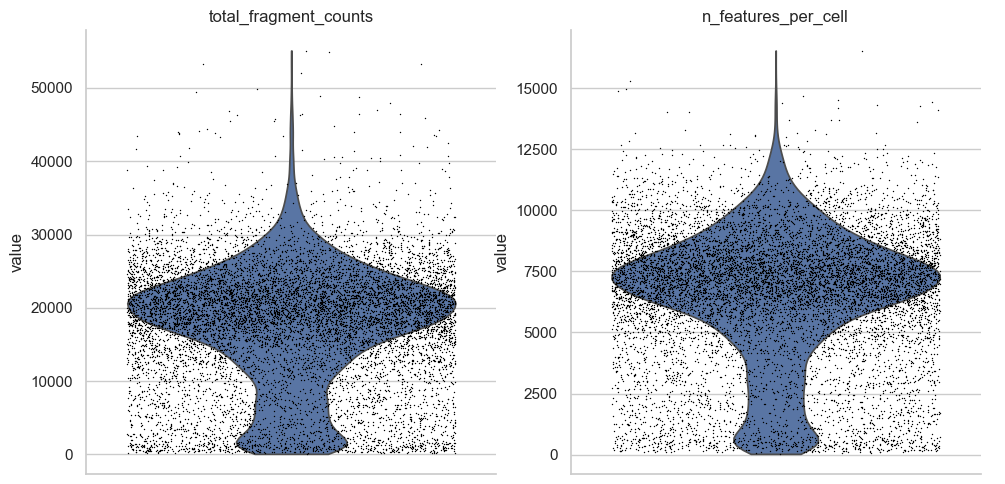

In [10]:
sc.pl.violin(atac, ['total_fragment_counts', 'n_features_per_cell'], jitter=0.4, multi_panel=True)

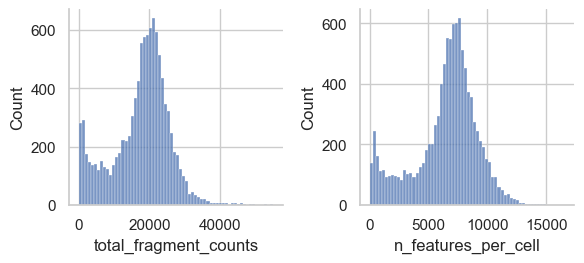

In [11]:
mu.pl.histogram(atac, ['total_fragment_counts', 'n_features_per_cell'])

#### 2.2.2. Nucleosome signal

Fetching Regions...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]


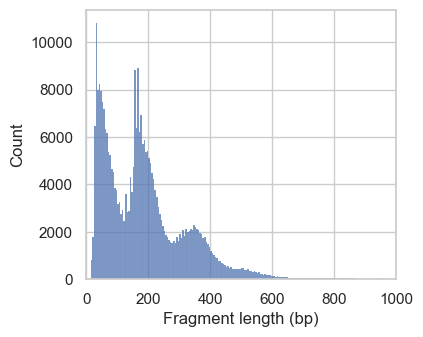

In [21]:
#plot frangment length within specific region
ac.pl.fragment_histogram(atac, region='chr1:1-2000000')

In [35]:
#The ratio of mono-nucleosome fragments to nucleosome-free fragments can be called nucleosome signal, 
#and it can be estimated using a subset of fragments.
#n = Number of fragments to count. If None, 1e4 fragments * number of cells
#Since this takes long to calculate, it can be reduced by a factor of 10, which still returns a good estimate.

ac.tl.nucleosome_signal(atac, n= 1e3* atac.n_obs)

Reading Fragments: 100%|█████████████████████████████████████████████████████████████████████████████████████| 10409000/10409000 [00:44<00:00, 234127.56it/s]


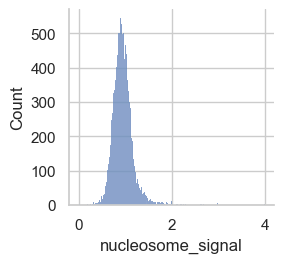

In [39]:
mu.pl.histogram(atac, "nucleosome_signal")

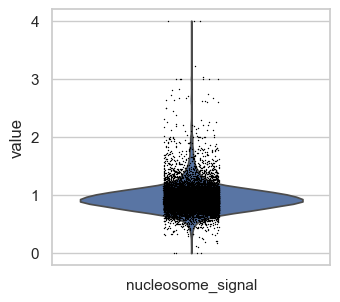

In [38]:
sc.pl.violin(atac, "nucleosome_signal")

In [40]:
# signal 2 and 4 = label low quality cells
#creat column to label the cell
nucleosome_signal_threshold = 2
atac.obs["nucleosome_signal_filter"] = atac.obs["nucleosome_signal"].apply(lambda x: 'NS_FAIL' if x > nucleosome_signal_threshold
                                                                           else 'NS_PASS')

In [42]:
atac.obs["nucleosome_signal_filter"].value_counts()

nucleosome_signal_filter
NS_PASS    10355
NS_FAIL       54
Name: count, dtype: int64

In [48]:
atac.obs["nucleosome_signal_filter"]  = atac.obs["nucleosome_signal_filter"].astype('category')
atac.obs["nucleosome_signal_filter"].dtype

CategoricalDtype(categories=['NS_FAIL', 'NS_PASS'], ordered=False, categories_dtype=object)

In [49]:
atac.obs["nucleosome_signal_filter"]

AAACAGCCAATCCCTT-1    NS_PASS
AAACAGCCAATGCGCT-1    NS_PASS
AAACAGCCACACTAAT-1    NS_PASS
AAACAGCCACCAACCG-1    NS_PASS
AAACAGCCAGGATAAC-1    NS_PASS
                       ...   
TTTGTTGGTGTTAAAC-1    NS_PASS
TTTGTTGGTTAGGATT-1    NS_PASS
TTTGTTGGTTGCAGTA-1    NS_PASS
TTTGTTGGTTGGTTAG-1    NS_PASS
TTTGTTGGTTTGCAGA-1    NS_PASS
Name: nucleosome_signal_filter, Length: 10409, dtype: category
Categories (2, object): ['NS_FAIL', 'NS_PASS']

Fetching Regions...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]


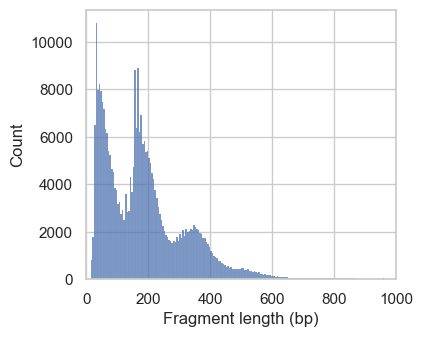

Fetching Regions...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]


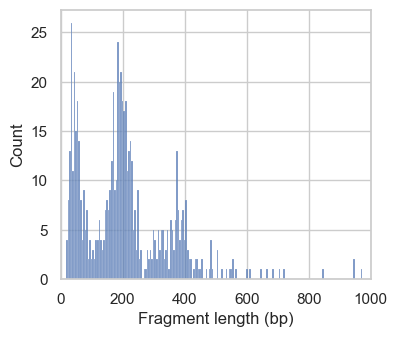

In [50]:
#plot the distribution of fragment lengths per group of cells.
p1 = ac.pl.fragment_histogram(atac[atac.obs["nucleosome_signal_filter"] == "NS_PASS"], region="chr1:1-2000000")

p2 = ac.pl.fragment_histogram(atac[atac.obs["nucleosome_signal_filter"] == "NS_FAIL"], region="chr1:1-2000000")

#### 2.2.3. Transcription start sites (TSS) enrichment

**Use mdata !!!!!**

In [74]:
#The positions of transcription start sites can be obtained from the interval field of the gene annotation in the rna modality
ac.tl.get_gene_annotation_from_rna(mdata['rna']).head(5)

,Chromosome,Start,End,gene_id,gene_name
MIR1302-2HG,chr1,29553,30267,ENSG00000243485,MIR1302-2HG
FAM138A,chr1,36080,36081,ENSG00000237613,FAM138A
OR4F5,chr1,65418,69055,ENSG00000186092,OR4F5
AL627309.1,chr1,120931,133723,ENSG00000238009,AL627309.1
AL627309.3,chr1,91104,91105,ENSG00000239945,AL627309.3


In [76]:
#to obtain a robust TSS score estimates while keeping compute time reasonably low, 
#we set the number of randomly selected TSS to calculate the score to n_tss=3000 (compared to the default of 2000).
# by default, features=ac.tl.get_gene_annotation_from_rna(mdata)
tss = ac.tl.tss_enrichment(mdata, n_tss = 3000, random_state=666)

Fetching Regions...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:52<00:00, 57.10it/s]
/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


TSS enrichment function will return an AnnData object with cells x bases dimensions where **bases correspond to positions around TSS and are defined by extend_upstream and extend_downstream parameters, each of them being 1000 bp by default**.  Additionally, a tss_score column is added to the **atac.obs** data frame.

In [77]:
tss

AnnData object with n_obs × n_vars = 11909 × 2001
    obs: 'tss_score'
    var: 'TSS_position'

In [80]:
atac

AnnData object with n_obs × n_vars = 10409 × 108377
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

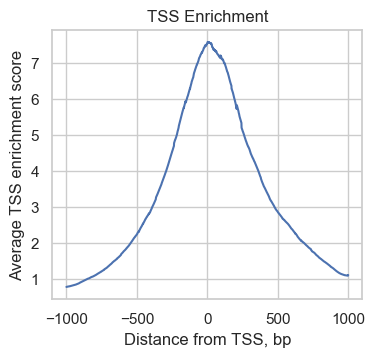

In [78]:
ac.pl.tss_enrichment(tss)

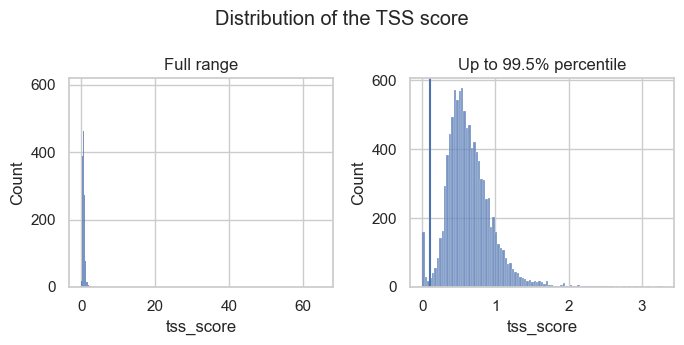

In [115]:
#check the distribution of the full range of scores and with extreme outliers removed (up to the 99.5% percentile).
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

p1 = sns.histplot(atac.obs, x="tss_score", ax=axs[0])
p1.set_title("Full range")

p2 = sns.histplot(atac.obs,x="tss_score",
    binrange=(0, atac.obs["tss_score"].quantile(0.995)),
    ax=axs[1])
p2.set_title("Up to 99.5% percentile")
plt.axvline(x=0.1) 

plt.suptitle("Distribution of the TSS score")

plt.tight_layout()
plt.show()

In [102]:
quantile995 = atac.obs["tss_score"].quantile(0.995)

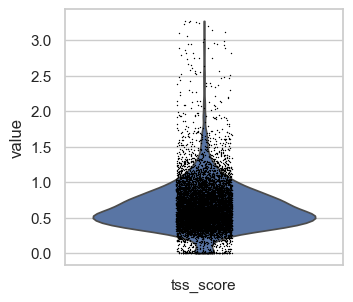

In [114]:
sc.pl.violin(atac[atac.obs["tss_score"] < quantile995], "tss_score")

In [118]:
#To compare the enrichment profile corresponding to high and low TSS scores, 
#a new column to tss.obs containing "TSS_PASS" or "TSS_FAIL" is added
#The histograms show that there are a few outliers with extremely high TSS scores and a small peak of barcodes with low TSS scores. 
#Both are observations we would like to filter out.
tss_threshold = 0.1
tss.obs["tss_filter"] = tss.obs["tss_score"].apply(lambda x: "TSS_PASS" if x > tss_threshold else "TSS_FAIL")

In [119]:
tss.obs["tss_filter"].value_counts()

tss_filter
TSS_PASS    11859
TSS_FAIL       50
Name: count, dtype: int64

In [120]:
tss.obs["tss_filter"] = tss.obs["tss_filter"].astype('category')

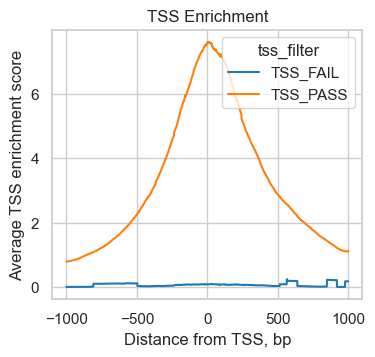

In [124]:
# Temporarily set different color palette
ac.pl.tss_enrichment(tss, color="tss_filter")

We can see, how the 50 cells with low TSS scores show a much reduced enrichment of fragments around the TSS compared to high quality cells indicating a lower signal to noise ratio.

In [126]:
atac.write_h5ad("atac_qc_metrics.h5ad")

### 2.3. Filtering cells

In [6]:
atac = sc.read("atac_qc_metrics.h5ad")
atac

AnnData object with n_obs × n_vars = 10409 × 108377
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

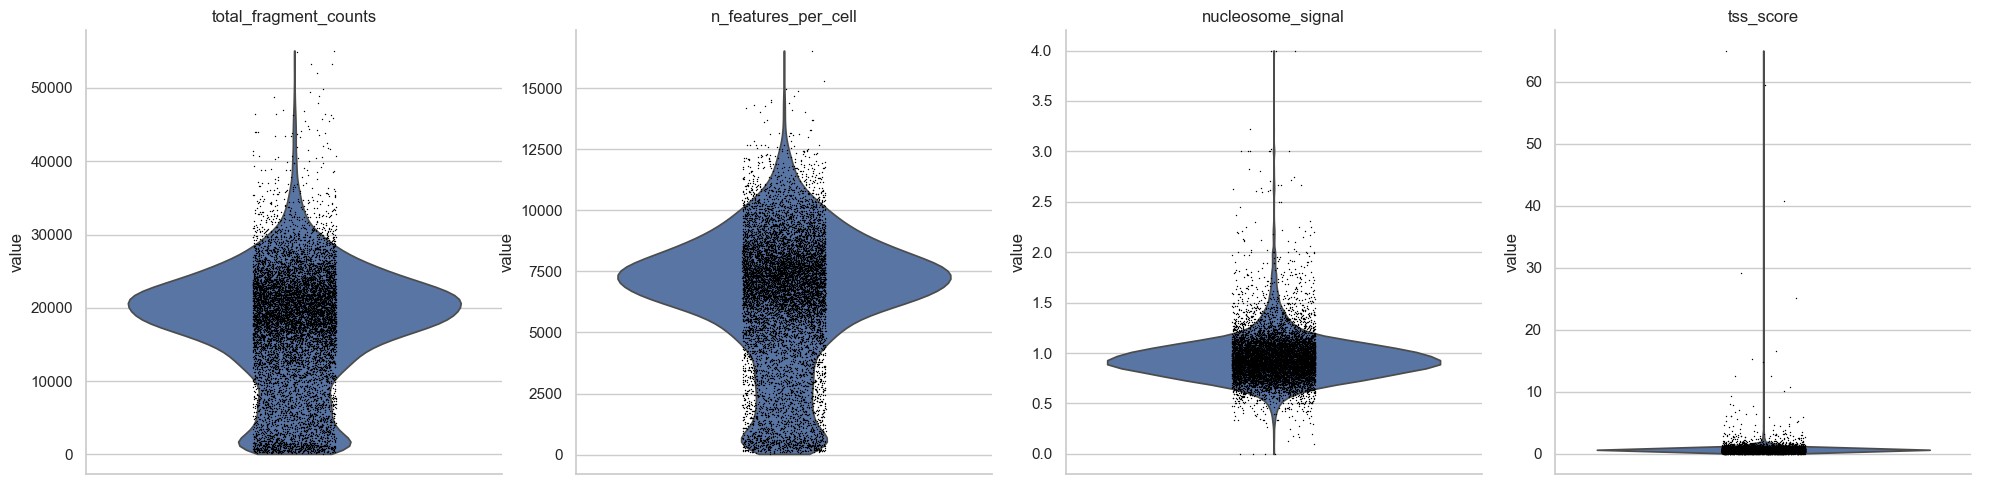

In [7]:
sc.pl.violin(atac, ['total_fragment_counts', 'n_features_per_cell', 'nucleosome_signal', 'tss_score'], multi_panel= True )

#### 2.3.1. upper bound threshold

In [8]:
#parameter
total_count_upper = 50000
tss_upper = 10
nucleosome_signal_upper = 2

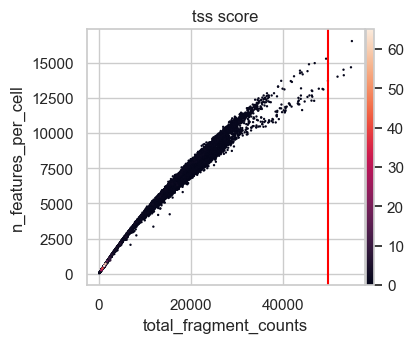

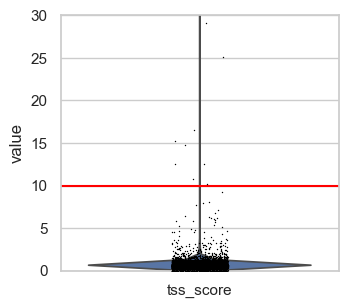

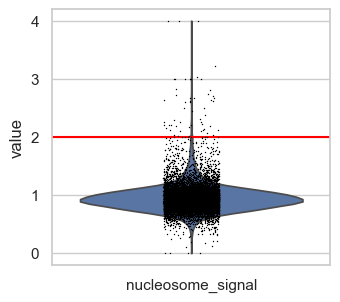

In [9]:
p1 = sc.pl.scatter(atac, x="total_fragment_counts", y="n_features_per_cell", color="tss_score", show=False)
p1.axvline(x=total_count_upper, c="red")  # Add vertical line

p2 = sc.pl.violin(atac, "tss_score", show=False)
p2.set_ylim(0, 30)
p2.axhline(y=tss_upper, c="red")

p3 = sc.pl.violin(atac, "nucleosome_signal", show=False)
p3.axhline(y=nucleosome_signal_upper, c="red")

plt.show()

a high TSS score is great, but extremely high values are likely artifacts. This is also supported by the first scatter plot, where the highest TSS score corresponds to a barcode with very low fragment count and number of features.

#### 2.3.2. lower bound threshold

In [10]:
# upper TSS score boundary for plotting
plot_tss_max = 10

# thresholds (before log transform)
count_cutoff_lower = 1500
lcount_cutoff_upper = 50000
tss_cutoff_lower = 0.1

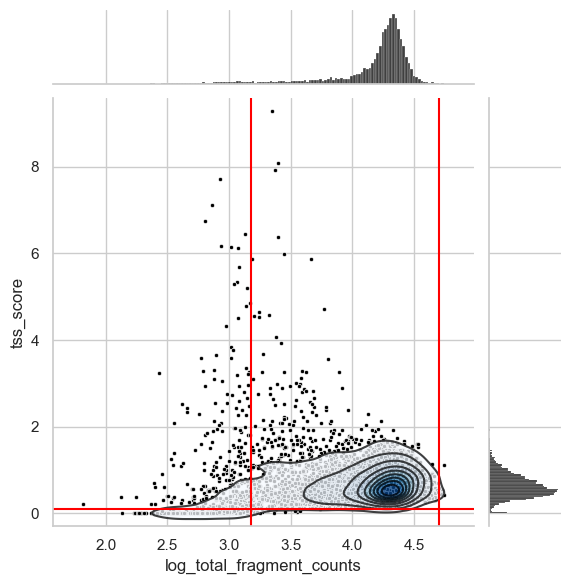

In [11]:
# Scatter plot & histograms
g = sns.jointplot(
    data=atac[(atac.obs["tss_score"] < plot_tss_max)].obs,
    x="log_total_fragment_counts",
    y="tss_score",
    color="black",
    marker=".",
)
# Density plot including lines
g.plot_joint(sns.kdeplot, fill=True, cmap="Blues", zorder=1, alpha=0.75)
g.plot_joint(sns.kdeplot, color="black", zorder=2, alpha=0.75)

# Lines thresholds
plt.axvline(x=np.log10(count_cutoff_lower), c="red")
plt.axvline(x=np.log10(lcount_cutoff_upper), c="red")
plt.axhline(y=tss_cutoff_lower, c="red")

plt.show()

the bottom left can be removed using TSS threshold. The upper left will be cut using total fragment count threshold. It is hard to choose. the additional plots that can help to find a suitable value will be generated.

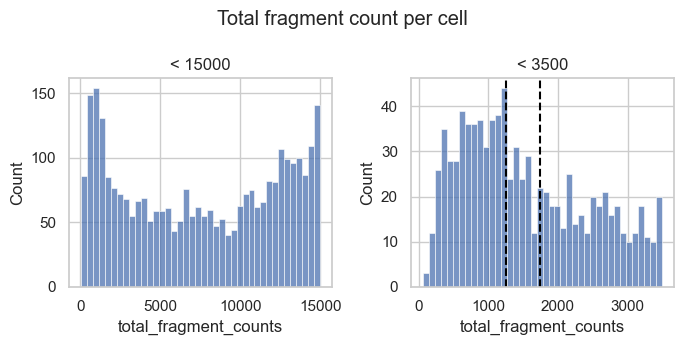

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

p1 = sns.histplot(
    atac.obs.loc[atac.obs["total_fragment_counts"] < 15000],
    x="total_fragment_counts",
    bins=40,
    ax=axs[0],
)
p1.set_title("< 15000")

p2 = sns.histplot(
    atac.obs.loc[atac.obs["total_fragment_counts"] < 3500],
    x="total_fragment_counts",
    bins=40,
    ax=axs[1],
)
p2.set_title("< 3500")
p2.axvline(x=1250, c="black", linestyle="--")
p2.axvline(x=1750, c="black", linestyle="--")

plt.suptitle("Total fragment count per cell")

plt.tight_layout()
plt.show()

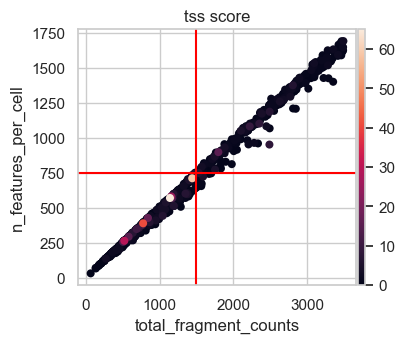

In [22]:
n_features_cutoff = 750
count_cutoff_lower =1500
p1 = sc.pl.scatter(atac[atac.obs["total_fragment_counts"] < 3500],
                   x="total_fragment_counts",
                   y="n_features_per_cell",
                   color="tss_score",
                   show=False)

p1.axvline(x=count_cutoff_lower, c="red")
p1.axhline(y=n_features_cutoff,c="red")

plt.show()                

To summarize the outcome of our analysis thresholds:

- Total number of fragment counts per cell: > 1500 and < 50000
- Number of features per cell: > 750 (corresponding to the total fragment counts of 1500)
- TSS score: > 0.1 and < 10
- Nucleosome signal: < 2

In [23]:
#conclusion
#upper cutoff
total_count_upper = 50000
tss_upper = 10
nucleosome_signal_upper = 2

#lower cutoff
count_cutoff_lower = 1500
tss_cutoff_lower = 0.1
n_features_cutoff = 750

In [24]:
print(f"Total number of cell: {atac.n_obs}")

Total number of cell: 10409


In [27]:
mu.pp.filter_obs(atac,
              "total_fragment_counts",
              lambda x: (x>= count_cutoff_lower) & (x<= total_count_upper)
             )

In [28]:
print(f"Number of cells after filtering on total_fragment_counts: {atac.n_obs}")

Number of cells after filtering on total_fragment_counts: 9900


In [30]:
mu.pp.filter_obs(atac,
                "n_features_per_cell",
                lambda x: x>=750,
               )

In [31]:
print(f"Number of cells after filtering on n_features_per_cell: {atac.n_obs}")

Number of cells after filtering on n_features_per_cell: 9886


In [32]:
mu.pp.filter_obs(atac,
                 "tss_score",
                 lambda x: (x>=0.1)&(x<=10))
print(f"Number of cells after filtering on tss score: {atac.n_obs}")

Number of cells after filtering on tss score: 9869


In [33]:
mu.pp.filter_obs(atac,
                 "nucleosome_signal",
                 lambda x: x<=2)
print(f"Number of cells after filtering on nuclosome signal: {atac.n_obs}")

Number of cells after filtering on nuclosome signal: 9834


### 2.4. Filtering features

In [35]:
#filter out features present in only a very low number of cells
print(f"Number of features: {atac.n_vars}")

Number of features: 108377


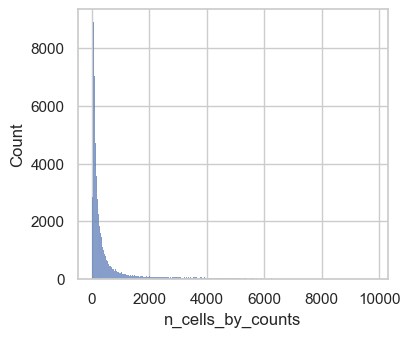

In [78]:
p1 = sns.histplot(atac.var["n_cells_by_counts"])
plt.show()

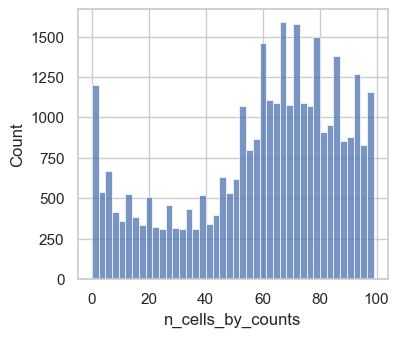

In [94]:
#zoomin
sns.histplot(atac.var["n_cells_by_counts"][atac.var["n_cells_by_counts"] < 100])
plt.show()

In [95]:
#If no rare cell states are of interest, features can be filtered to be present in at least 1% of the cells.
# all cell is 11909 , 1% =12 cells but we will use 15 cells
mu.pp.filter_var(atac, "n_cells_by_counts", lambda x: x >= 15)

In [96]:
print(f"Number of features after filtering: {atac.n_vars}")

Number of features after filtering: 104680


In [99]:
#save raw count
atac.layers["counts"] = atac.X

In [100]:
atac

AnnData object with n_obs × n_vars = 9834 × 104680
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'
    layers: 'counts'

In [101]:
atac.write_h5ad("atac_qc_filtered.h5ad")

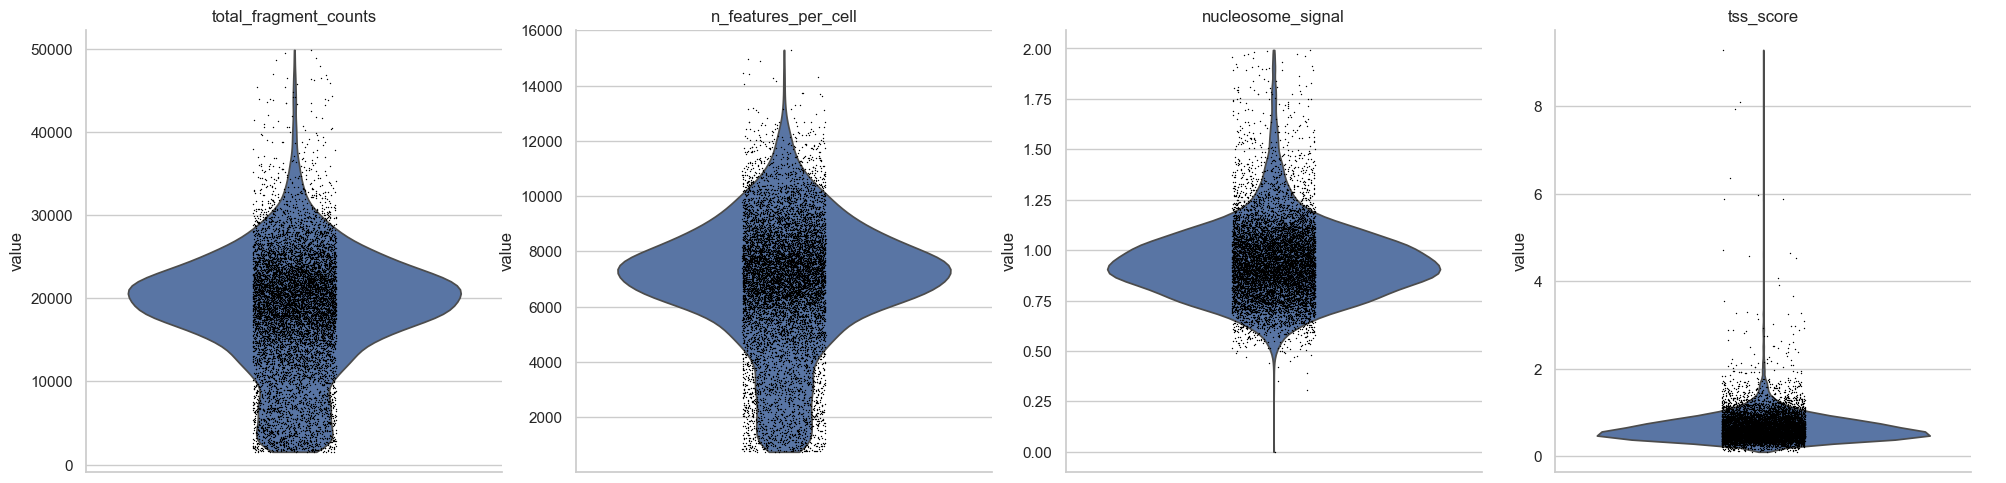

In [102]:
sc.pl.violin(atac, ['total_fragment_counts', 'n_features_per_cell', 'nucleosome_signal', 'tss_score'], multi_panel= True )

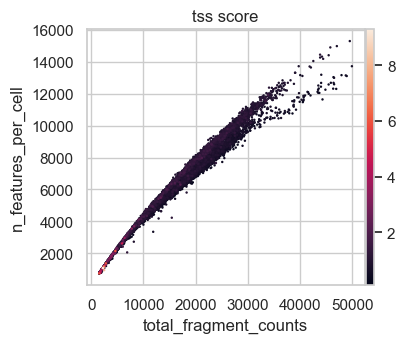

In [104]:
p1 = sc.pl.scatter(atac, x="total_fragment_counts", y="n_features_per_cell", color="tss_score", show=False)

###  3. Normalisation

In [109]:
atac = sc.read('atac_qc_filtered.h5ad')

In [110]:
atac

AnnData object with n_obs × n_vars = 9834 × 104680
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'
    layers: 'counts'

In [111]:
#Transform peak counts with TF-IDF
ac.pp.tfidf(atac, scale_factor=1e4)

In [112]:
sc.pp.normalize_total(atac, target_sum=1e4)
sc.pp.log1p(atac)

In [113]:
atac

AnnData object with n_obs × n_vars = 9834 × 104680
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files', 'log1p'
    layers: 'counts'

### 4. Feature selection

In [114]:
sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5)

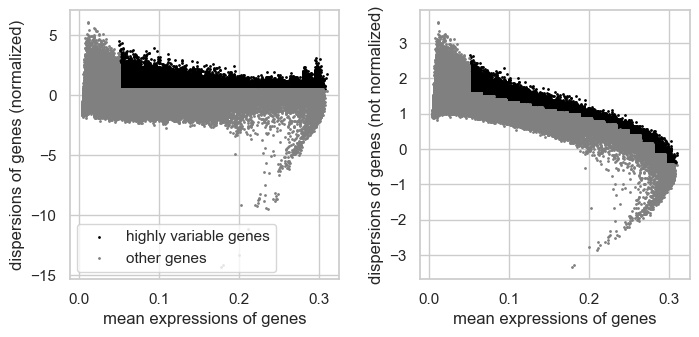

In [115]:
sc.pl.highly_variable_genes(atac)

In [116]:
np.sum(atac.var['highly_variable'])

17892

In [117]:
#For uniformity, and for consequent visualisation, we’ll save log-transformed counts in a .raw slot:
atac.raw = atac

## 4. Analysis

### 4.1. LSI

In [118]:
ac.tl.lsi(atac)

In [193]:
total_raw_count = atac.layers['counts'].sum(axis=1)
total_raw_count

matrix([[20492.],
        [16674.],
        [ 2007.],
        ...,
        [10558.],
        [17052.],
        [22728.]], dtype=float32)

In [194]:
#change to array
total_raw_count = np.array(total_raw_count)
total_raw_count

array([[20492.],
       [16674.],
       [ 2007.],
       ...,
       [10558.],
       [17052.],
       [22728.]], dtype=float32)

In [195]:
# Flatten and convert to list
total_raw_count = total_raw_count.flatten().tolist()
total_raw_count[0:5]

[20492.0, 16674.0, 2007.0, 7657.0, 10355.0]

In [196]:
lsi_components = atac.obsm['X_lsi']
lsi_components

array([[ 1.1507564 , -0.8198527 ,  0.12320147, ...,  0.3720807 ,
         0.55326265,  0.29314163],
       [ 0.39548984, -0.78568876,  0.70277196, ..., -0.32420436,
         0.4205203 , -1.0570692 ],
       [-2.537675  , -0.40805718,  0.24721427, ..., -0.6346429 ,
        -0.76997685, -0.2943323 ],
       ...,
       [-0.0605381 , -0.5250859 , -0.9194138 , ...,  2.24034   ,
         1.8787318 ,  1.5888758 ],
       [ 0.64712226, -0.77082026,  0.29831737, ..., -1.2751687 ,
        -2.006891  ,  0.48108965],
       [ 1.4819571 , -1.0033792 ,  0.19775824, ...,  0.03151917,
        -0.34287736, -0.23775321]], dtype=float32)

In [197]:
print(lsi_components.shape[0])
#number of LSI component
print(lsi_components.shape[1])

9834
50


In [199]:
# Create a DataFrame with LSI components and total raw counts
lsi_df = pd.DataFrame(lsi_components, columns=[f'LSI{i+1}' for i in range(lsi_components.shape[1])])
lsi_df['total_counts'] = total_raw_count
lsi_df.head(5)

,LSI1,LSI2,LSI3,LSI4,LSI5,LSI6,LSI7,LSI8,LSI9,LSI10,...,LSI42,LSI43,LSI44,LSI45,LSI46,LSI47,LSI48,LSI49,LSI50,total_counts
0,1.150756,-0.819853,0.123201,0.377042,-1.310919,0.329723,-0.941897,1.279904,-0.860736,-1.718942,...,-0.753405,-1.420846,-1.303344,-0.803678,-0.055395,-0.349789,0.372081,0.553263,0.293142,20492.0
1,0.395490,-0.785689,0.702772,-0.869749,0.989906,0.459837,-0.082839,-0.112717,0.887002,0.875333,...,-0.466384,-0.005660,1.026665,0.455970,-0.650071,-1.200381,-0.324204,0.420520,-1.057069,16674.0
2,-2.537675,-0.408057,0.247214,-0.249669,0.183724,-0.313532,0.171098,-0.364573,-0.904444,0.040969,...,0.743942,-1.650657,-0.371862,0.076253,1.767627,-1.807178,-0.634643,-0.769977,-0.294332,2007.0
3,-0.524416,-0.662303,0.305555,-0.312755,0.898206,-0.126641,-0.299995,0.521400,-0.944439,-1.224681,...,-0.450815,6.510220,1.195802,-1.093879,-1.685488,-2.775929,-0.061028,0.494437,-1.123541,7657.0
4,0.218682,-0.846301,0.768311,-0.895708,0.292810,-0.774584,0.713650,-1.374533,0.213300,0.595568,...,1.415289,3.085481,-1.568551,-0.800730,1.023943,0.475712,-0.405933,1.960370,1.161544,10355.0


In [220]:
# Compute pairwise correlation of columns in a DataFrame
correlations = lsi_df.corr()['total_counts'].drop('total_counts')  # Correlation between total counts and each LSI component
correlations[0:5]

LSI1    0.446112
LSI2    0.207833
LSI3   -0.083740
LSI4   -0.120242
LSI5    0.086620
Name: total_counts, dtype: float64

In [221]:
correlations = correlations.reset_index() # Convert Series to DataFrame
correlations.columns = ['components', 'correlation']
correlations.head(5)

,components,correlation
0,LSI1,0.446112
1,LSI2,0.207833
2,LSI3,-0.083740
3,LSI4,-0.120242
4,LSI5,0.086620


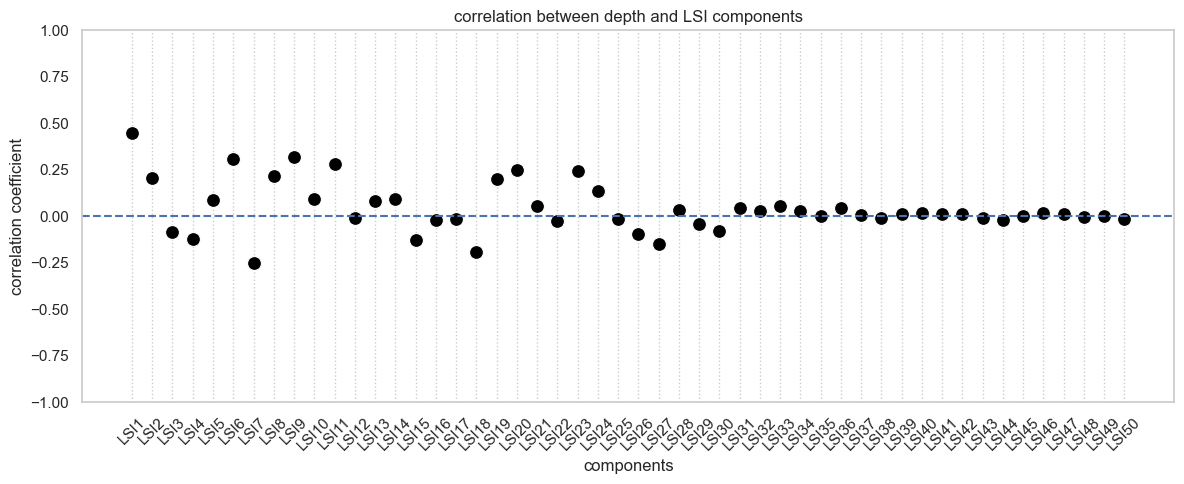

In [247]:
#plot
plt.figure(figsize=(12,5))
sns.scatterplot(data=correlations, x='components', y='correlation', s=100, color='black')

plt.title('correlation between depth and LSI components')
plt.xlabel('components')
plt.ylabel('correlation coefficient')
plt.axhline(0, linestyle = '--')
plt.xticks(rotation=45)

# Remove all grid lines first
plt.grid(False)
# Enable only vertical grid lines
plt.grid(axis='x', linestyle=':')

plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


In [248]:
atac

AnnData object with n_obs × n_vars = 9834 × 104680
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'nucleosome_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'atac', 'files', 'log1p', 'hvg', 'lsi'
    obsm: 'X_lsi'
    varm: 'LSI'
    layers: 'counts'

In [253]:
#remove LSI1
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm['LSI'] = atac.varm['LSI'][:, 1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]